code to create a baseline pandemic flu simulation


In [63]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
from random import randrange,randint,uniform,random,sample
from timeit import default_timer as timer
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
print("Hello Github 125")
threshold=6
cfr=0.1
quarantine=True
Num_days = 50
num_ppl = 1000
movement = 10
move_sdev = 5
size_min = 0
size_max = 1000
p_zero = {'day':[], 'xpos':[], 'ypos':[]}
p_rand = {'day':[], 'xpos':[], 'ypos':[]}

Hello Github 125


Initializing a dataframe of 1000 'people' in a 2-dimensional space with various attributes. 

In [64]:
def initialize():
    

    # various attributes of each person
    per_num = []
    x_pos = []
    y_pos = []
    infected = []
    time_infected = []
    recovered = []
    immune = []
    alive = []


    #for person number, x_pos and y_pos, we set these for each individaul

    for i in range(0,num_ppl):
        per_num.append(i)
        x_pos.append(np.random.randint(size_min,size_max))
        y_pos.append(np.random.randint(size_min,size_max))


    # for infected, time_infected, and alive, we set these for all people to start with default values
    infected = [0]*num_ppl
    time_infected = [np.NaN]*num_ppl
    alive = [1]*num_ppl
    recovered = [0]*num_ppl
    immune = [0]*num_ppl

    population = pd.DataFrame(list(zip(per_num, x_pos, y_pos, infected, time_infected, recovered, immune, alive)),
                              columns = ["per_num", "x_pos", "y_pos", "infected",  
                                         "time_infected", "recovered", "immune","alive"])
    rand=[randint(0, num_ppl) for p in range(0, 19)]
    print(rand)
    population.loc[rand, 'infected'] = 1
    population.loc[0, 'infected'] = 1
    population.loc[rand, 'time_infected'] = 0
    print(population)
    return population

Now we infect patient 0 in our pandemic 

Setting up parameters and logs for the simulation

In [65]:
def initiate_distance_matrix(population):
    
    # Setting parameters for movement of our simulated people 
    #the average person moves X units on the x axis and 10 units in the y axis. 
    #creating a log for the movement of patient zero (who we infect) & a random person (we'll pick person 25)

    p_zero = {'day':[], 'xpos':[], 'ypos':[]}

    p_rand = {'day':[], 'xpos':[], 'ypos':[]}

    infected_array = population.loc[(population['infected'] == 1), 'x_pos':'y_pos']
    pop_pos_array = population.loc[:, 'x_pos':'y_pos']

    #Initial distance matrix
    mtx0 = distance_matrix( pop_pos_array, infected_array)
    return mtx0

Running the simulation

[160, 720, 990, 385, 774, 196, 317, 748, 783, 10, 63, 974, 790, 505, 715, 615, 641, 719, 517]
     per_num  x_pos  y_pos  infected  time_infected  recovered  immune  alive
0          0    141    326         1            NaN          0       0      1
1          1    120    199         0            NaN          0       0      1
2          2    653    564         0            NaN          0       0      1
3          3    566     72         0            NaN          0       0      1
4          4    443    774         0            NaN          0       0      1
..       ...    ...    ...       ...            ...        ...     ...    ...
995      995    649    750         0            NaN          0       0      1
996      996     25    199         0            NaN          0       0      1
997      997    782    114         0            NaN          0       0      1
998      998    163    728         0            NaN          0       0      1
999      999    963    660         0            

Day 27 | 3 newly infected | 72 total infected | 56 have recovered | 8 have died
Day 28 | 5 newly infected | 73 total infected | 60 have recovered | 8 have died
Day 29 | 9 newly infected | 75 total infected | 67 have recovered | 8 have died
Day 30 | 5 newly infected | 75 total infected | 72 have recovered | 8 have died
Day 31 | 2 newly infected | 72 total infected | 77 have recovered | 8 have died
Day 32 | 3 newly infected | 66 total infected | 83 have recovered | 11 have died
Day 33 | 3 newly infected | 68 total infected | 84 have recovered | 11 have died
Day 34 | 7 newly infected | 66 total infected | 93 have recovered | 11 have died
Day 35 | 1 newly infected | 60 total infected | 100 have recovered | 11 have died
Day 36 | 2 newly infected | 60 total infected | 102 have recovered | 11 have died
Day 37 | 2 newly infected | 58 total infected | 106 have recovered | 11 have died
Day 38 | 4 newly infected | 58 total infected | 110 have recovered | 11 have died
Day 39 | 5 newly infected | 6

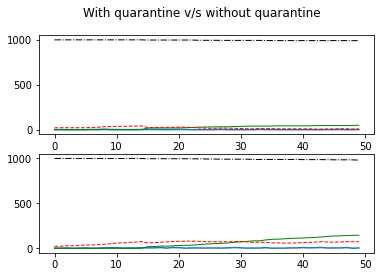

In [66]:
# def movePeopleUsingDistribution(population):
#     for p in range(0,num_ppl):
#         #next, adjust movement (right now, everyone moves an average of 10 units each day)
#         #the first part creates a random variable from a normal dist. the second determines if it is positive or negative
#         x_move = np.random.normal(movement,move_sdev) * (-1 + 2*np.random.binomial(1,0.5))
#         y_move = np.random.normal(movement,move_sdev) * (-1 + 2*np.random.binomial(1,0.5))

#         if ((population.loc[p,'x_pos'] + x_move) < size_max) & ((population.loc[p,'x_pos'] + x_move) > size_min) :
#             population.loc[p,'x_pos'] = population.loc[p,'x_pos'] + x_move
#         else: 
#             population.loc[p,'x_pos'] = population.loc[p,'x_pos'] - x_move

#         if ((population.loc[p,'y_pos'] + y_move) < size_max) & ((population.loc[p,'y_pos'] + y_move) > size_min) :
#             population.loc[p,'y_pos'] = population.loc[p,'y_pos'] + y_move
#         else: 
#             population.loc[p,'y_pos'] = population.loc[p,'y_pos'] - y_move
#     return population

# def movePeopleRandomly(population):
#     population['x_pos'] = [random.uniform(size_min,size_max) for i in range(0,num_ppl)]
#     population['y_pos'] = [random.uniform(size_min,size_max) for i in range(0,num_ppl)]
#     return population


# start = timer()
# movePeopleUsingDistribution(population)
# end = timer()
# print("distribution: ",end-start)


# start1 = timer()
# movePeopleRandomly(population)
# end1 = timer()
# print("random positions: ",end1-start1)

def simulate(population,axs,mtx0):
    #creating a log for the simulation at each day
    results = {'day':[], 'new_infections':[], 'infected':[], 'recovered':[], 'immune':[], 'alive':[]}

    mtx = mtx0

    for day in range(0, Num_days):
        t11=timer()

        new_infections = 0

        #loop through the population to determine status, and then change their position
        for p in range(0,num_ppl):
            #first determine if they were infected
            t1=timer()
            if population.loc[p,'infected'] == 0 and population.loc[p,'immune'] == 0:
                if(any(mtx[p]<=threshold)):
                    population.loc[p,'infected'] = 1
                    population.loc[p,'time_infected'] = day
                    new_infections += 1
    #                 print('person {p} infected on day {d}'.format(p = p, d = day))
            t2=timer()         
    #         print("time taken for new infections:",t2-t1)

            t3=timer()
            #next, for sick people, determine if they are better or if they have died
            if (population.loc[p,'infected'] == 1 and population.loc[p,'alive'] == 1 and  
                (day - population.loc[p,'time_infected']) >14):
                #determine if they died or got better
                if (np.random.rand() <= cfr): 
                    population.loc[p,'alive'] = 0
                    population.loc[p,'infected'] = 0
                else: 
                    population.loc[p,'infected'] = 0
                    population.loc[p,'immune'] = 1
                    population.loc[p,'recovered'] = 1
            t4=timer()         
    #         print("time taken for recoveries:",t4-t3)    



            t5=timer()
            #next, adjust movement (right now, everyone moves an average of 10 units each day)
            #the first part creates a random variable from a normal dist. the second determines if it is positive or negative
            x_move = np.random.normal(movement,move_sdev) * (-1 + 2*np.random.binomial(1,0.5))
            y_move = np.random.normal(movement,move_sdev) * (-1 + 2*np.random.binomial(1,0.5))
            if not(quarantine and population.loc[p,'infected'] == 1):
                if ((population.loc[p,'x_pos'] + x_move) < size_max) & ((population.loc[p,'x_pos'] + x_move) > size_min) :
                    population.loc[p,'x_pos'] = population.loc[p,'x_pos'] + x_move
                else: 
                    population.loc[p,'x_pos'] = population.loc[p,'x_pos'] - x_move

                if ((population.loc[p,'y_pos'] + y_move) < size_max) & ((population.loc[p,'y_pos'] + y_move) > size_min) :
                    population.loc[p,'y_pos'] = population.loc[p,'y_pos'] + y_move
                else: 
                    population.loc[p,'y_pos'] = population.loc[p,'y_pos'] - y_move

            t6=timer()
    #         print("new positions:",t6-t5)
            #now we need to make a new distance matrix
            infected_array_day = population.loc[(population['infected'] == 1), 'x_pos':'y_pos']
            pop_pos_array_day = population.loc[:, 'x_pos':'y_pos']

#         list_of_infected=np.where((population["infected"] ==1) & (population["alive"]==1) & (population["time_infected"]>14))[0]
#         num_of_infected=len(list_of_infected)
#         new_deaths=round(num_of_infected*cfr)
# #         print(type(list_of_infected[0:]))
# #         print(new_deaths)
# #         print(list_of_infected.tolist())
# #         print(type(list_of_infected.tolist()))
#         pop_death_indices=random.sample(list_of_infected.tolist(), new_deaths)
#         population.loc[pop_death_indices,'alive']=0;
        
        
            
        t7=timer()
        #updated distance matrix
        mtx = distance_matrix( pop_pos_array_day, infected_array_day)
        t8 = timer()
    #         print("new distance matrix:",t8-t7)



        #update the log each day: 
        #path of patient zero
        p_zero['day'].append(day)
        p_zero['xpos'].append(population.loc[0,'x_pos'])
        p_zero['ypos'].append(population.loc[0,'y_pos'])

        #path of a random person (25)
        p_rand['day'].append(day)
        p_rand['xpos'].append(population.loc[25,'x_pos'])
        p_rand['ypos'].append(population.loc[25,'y_pos'])

        #overall results

        tot_infected = sum(population['infected'] == 1)
        tot_recovered = sum(population['recovered'] == 1)
        tot_immune = sum(population['immune'] == 1)
        tot_alive = sum(population['alive'] == 1)
        results['day'].append(day)
        results['new_infections'].append(new_infections)
        results['infected'].append(tot_infected)
        results['recovered'].append(tot_recovered)     
        results['immune'].append(tot_immune)  
        results['alive'].append(tot_alive)
        t12=timer()
    #     print("overall one day simulations:",t12-t11)

        print('Day {0} | {1} newly infected | {2} total infected | {3} have recovered | {4} have died'
              .format(day, new_infections, tot_infected, tot_recovered, (num_ppl - tot_alive)))
    res=pd.DataFrame(results)
    #display(res)
    now = datetime.now()
    axs.plot(results["day"], results["new_infections"],label="new_infections")
    axs.plot(results["day"], results["recovered"], color='green',linewidth=1.0,label="recovered")
    axs.plot(results["day"], results["infected"],color='red', linewidth=1.0, linestyle='--',label="infected")
    axs.plot(results["day"], results["alive"],color='black', linewidth=1.0, linestyle='-.',label="alive")
    res.to_csv('simulation'+now.strftime("%m_%d_%Y, %H%M%S")+'.csv', encoding='utf-8')

fig, axs = plt.subplots(2)
fig.suptitle('With quarantine v/s without quarantine')
pop1=initialize()
mtx0=initiate_distance_matrix(pop1)
simulate(pop1,axs[0],mtx0)



quarantine=False
pop2=initialize()
mtx0=initiate_distance_matrix(pop2)
simulate(pop2,axs[1],mtx0)
plt.show()

In [54]:
print(np.random.normal(movement,move_sdev)*(-1 + 2*np.random.binomial(1,0.5)))

-15.577280232010223


In [55]:
print(np.random.rand())


0.4168882157485836


In [61]:
p_zerodf = pd.DataFrame(p_zero)
p_zerodf
p_randdf = pd.DataFrame(p_rand)
p_randdf

,day,xpos,ypos
0,0,47.698846,186.360374
1,1,57.173534,195.147536
2,2,43.506248,206.312117
3,3,31.017727,198.397051
4,4,34.147545,206.436791
...,...,...,...
95,45,170.082735,334.388773
96,46,156.498731,322.720980
97,47,171.815416,313.623340
98,48,179.414628,315.436677


In [62]:

p_zerodf.to_csv("personzero_track.csv", encoding = "utf-8")
p_randdf.to_csv("person25_track.csv", encoding = "utf-8")